## 可视化三维样本数据点的PCA过程

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 在三维空间随机生成100个样本点
np.random.seed(6666)
X = np.random.random(size=(100, 3)) # 生成一个随机矩阵，100个样本，3个特征值

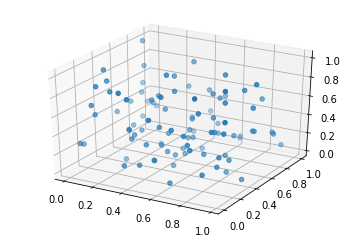

In [2]:
# X
ax = plt.axes(projection='3d') # 生成一个坐标轴对象，会用到mplot3d
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2])
plt.show()

In [3]:
def f(w, X): # 目标函数就是方差啦，这里写成了矩阵的形式，当然中间经过了不少推导过程了
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X): # 矩阵求导方法
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w) # 也就是得到向量的模

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon= 1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 单位化，计算目标函数和目标函数梯度的时候都是用的单位向量
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

In [4]:
np.random.random(X.shape[1]) # 产生一个随机向量，元素个数是X.shape[1]

array([ 0.44238359,  0.82576449,  0.77259385])

In [5]:
initial_w = np.random.random(X.shape[1]) # 不能从0开始，从任意一个整数开始
eta = 0.01 # 学习率
w1 = first_component(X, initial_w, eta) # X是作用对象
w1 # 求出第一主成分

array([ 0.61997377,  0.55569546,  0.55392697])

In [6]:
# 将原来的所有样本点X去除在第一主成分上的分量，得到X2
X2 = np.empty(X.shape)
for i in range(len(X)): # 从0开始
    X2[i] = X[i] - X[i].dot(w1) * w1# 去除在第一主成分上的分量，得到X2[i]

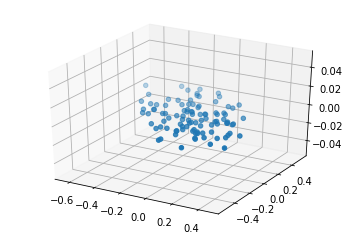

In [7]:
# 绘制X2，此时，X2的所有样本点分布在一个平面上
ax = plt.axes(projection='3d')
ax.scatter3D(X2[:, 0], X2[:, 2])
plt.show()

In [9]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.00349068, -0.70401803,  0.71017352])

In [11]:
X3 = np.empty(X2.shape)
for i in range(len(X)):
    X3[i] = X2[i] - X2[i].dot(w2) * w2

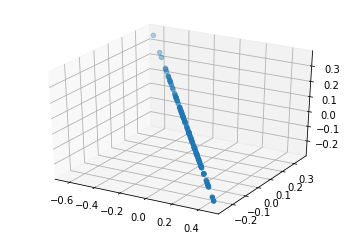

In [12]:
# 绘制X3，此时X3的所有样本点分布在一条直线上
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2])
plt.show()